# Обработка и распознавание изображений

## Load

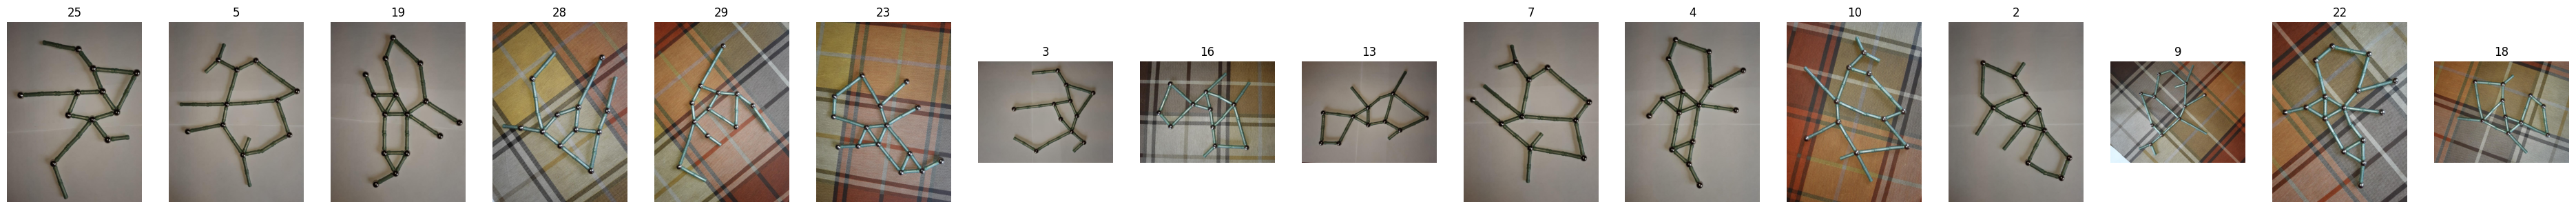

In [1]:
from segmentation import load, imshow
%matplotlib inline


images = load('images', 'jpg')
imshow(images)

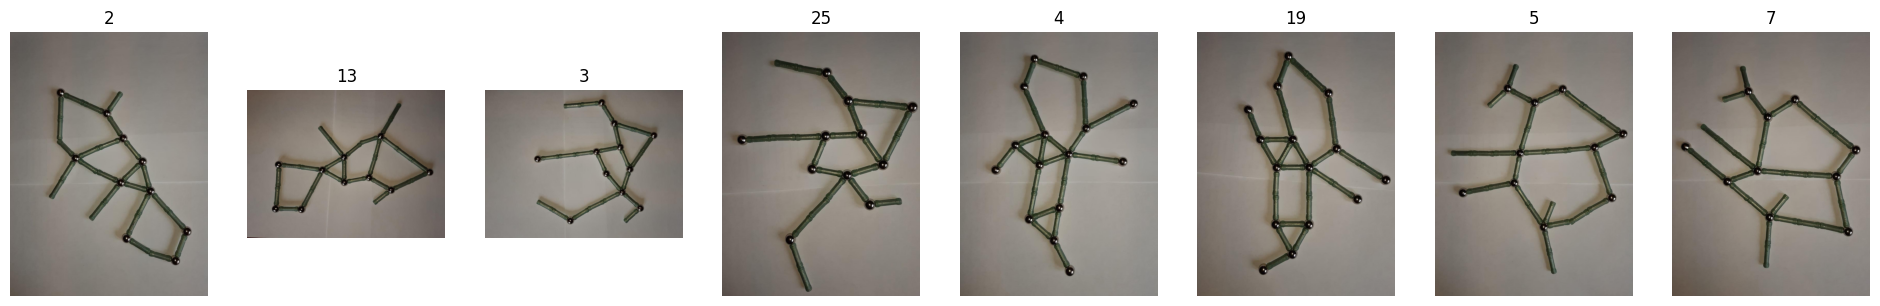

In [2]:
images_w = {}
for key in [2, 13, 3, 25, 4, 19, 5, 7]:
    images_w[key] = images[key]
imshow(images_w)

## Find Circles

In [3]:
from segmentation import find_circles


detected_circles_dict = find_circles(images_w)

In [4]:
import numpy as np
import cv2


def add_circles(img_dict, detected_circles_dict):
    res = {}
    for key, detected_circles in detected_circles_dict.items():
        res[key] = img_dict[key].copy()
        if detected_circles is None:
            continue

        detected_circles = np.uint16(np.around(detected_circles))
        for a, b, r in detected_circles[0, :]:
            cv2.circle(res[key], (a,b), r, color=(0,255,0), thickness=2)
    return res 

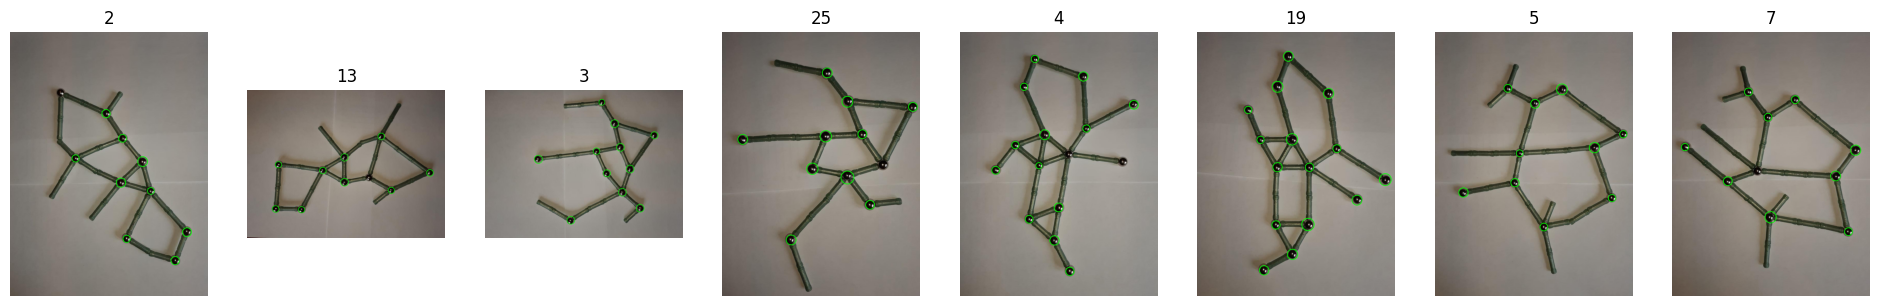

In [5]:
with_circles = add_circles(images_w, detected_circles_dict)
imshow(with_circles)

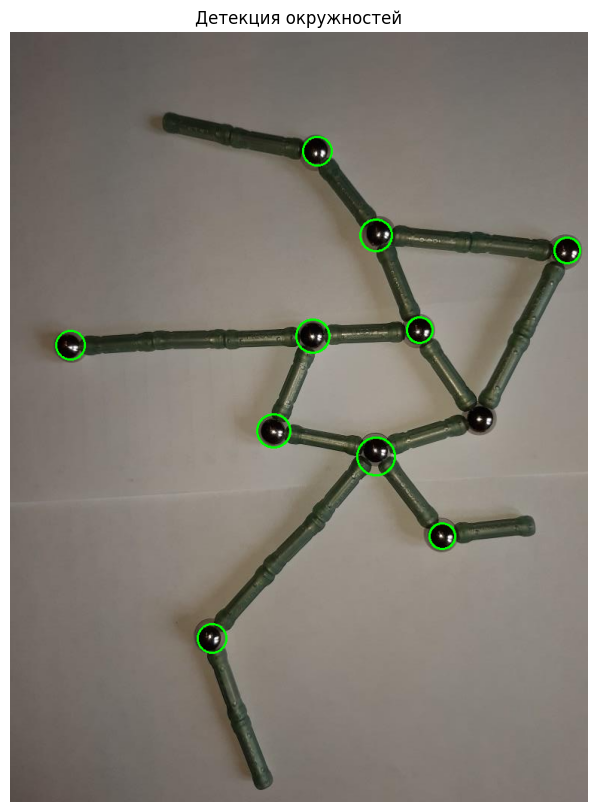

In [6]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10,10))
plt.imshow(with_circles[25])
plt.axis('off')
plt.title('Детекция окружностей')
plt.savefig('circles.svg', bbox_inches='tight')

## Binarize

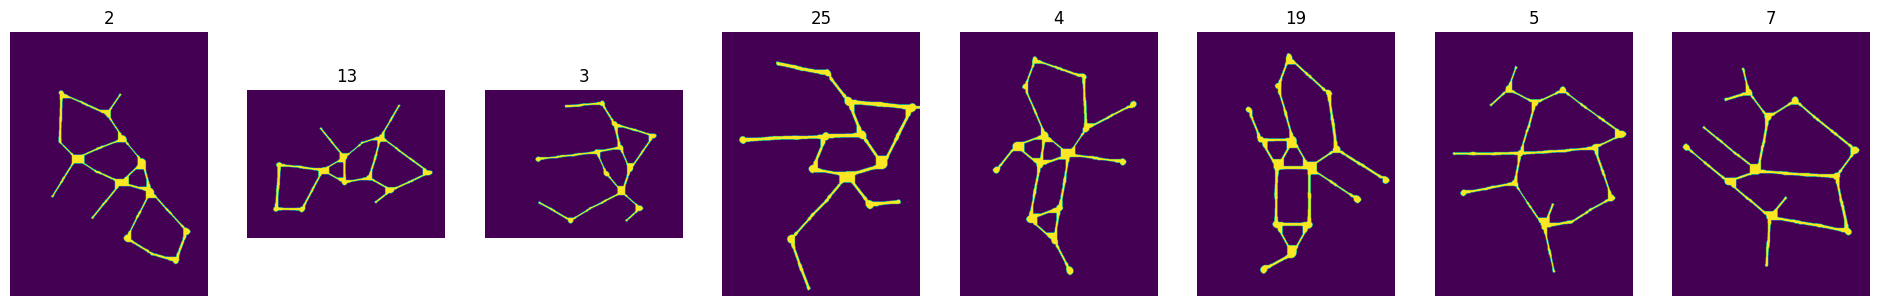

In [7]:
from segmentation import binarize


binarized = binarize(images_w)
imshow(binarized)

## Skeletonize

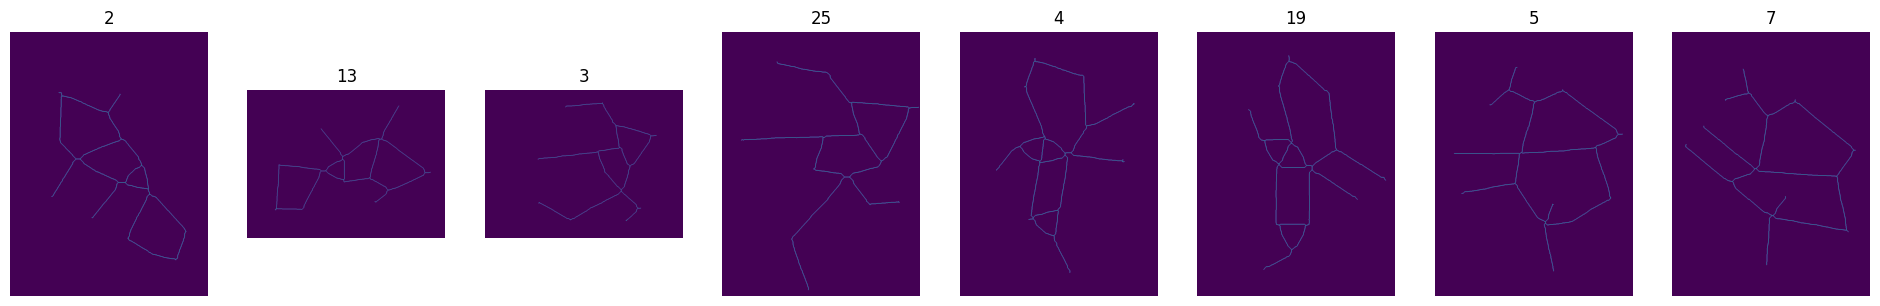

In [8]:
from skeleton import skeletonize


skeletonized = skeletonize(binarized)
imshow(skeletonized)

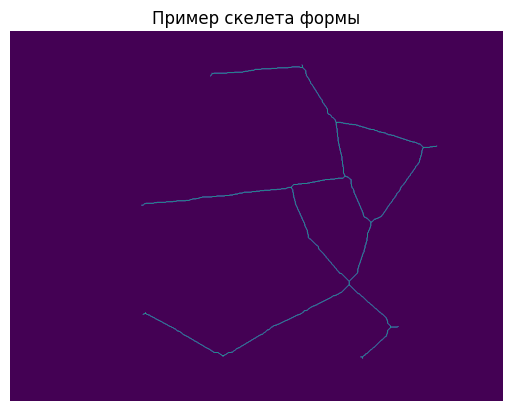

In [9]:
import matplotlib.pyplot as plt

plt.imshow(skeletonized[3])
plt.axis('off')
plt.title('Пример скелета формы')
plt.savefig('skeleton_demo.svg', bbox_inches='tight')

## Add Notches

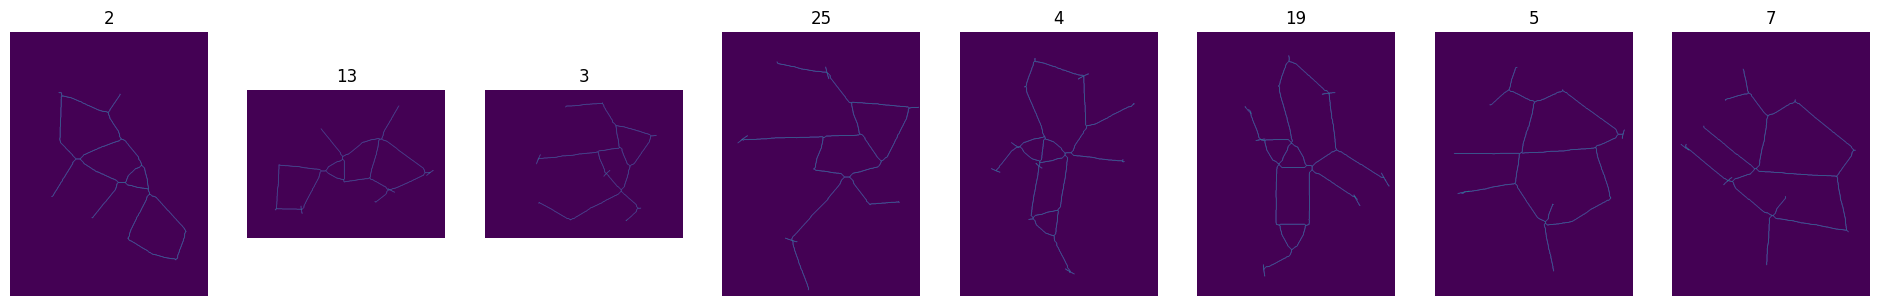

In [10]:
from segmentation import add_notches


skeletonized_with_notches = add_notches(skeletonized, detected_circles_dict)
imshow(skeletonized_with_notches)

## Draw Paths without Notches

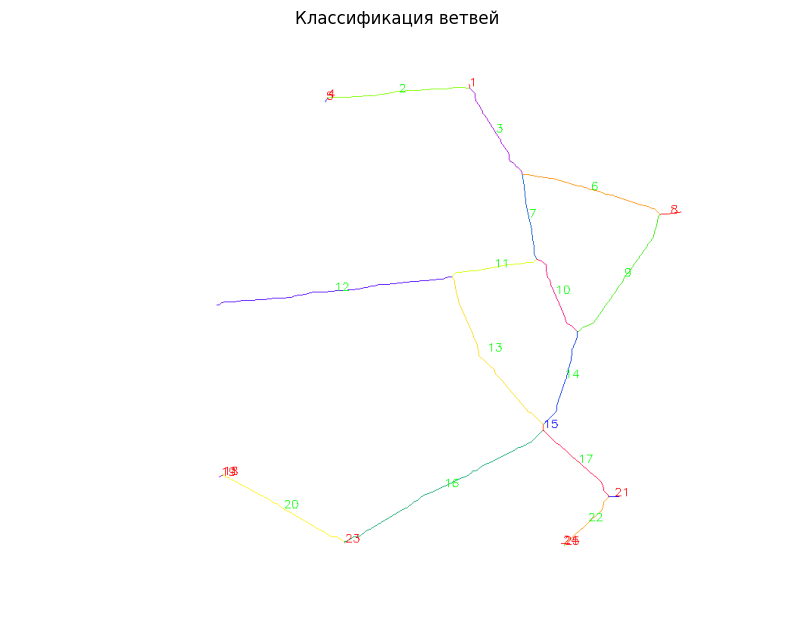

In [11]:
from skan.csr import Skeleton
from skeleton import draw_paths


skeleton = Skeleton(skeletonized[3])
plt.figure(figsize=(10,10))
plt.imshow(draw_paths(skeleton))
plt.axis('off')
plt.title('Классификация ветвей')
plt.savefig('edge_clf_demo.svg', bbox_inches='tight')

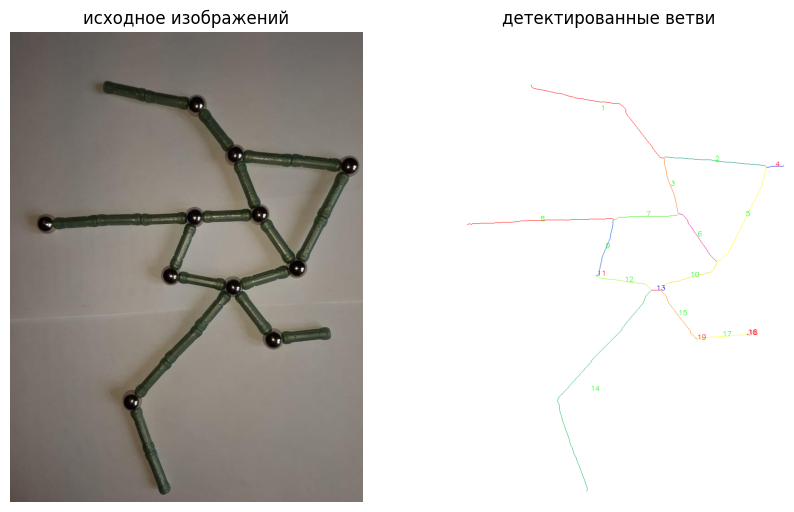

In [12]:
skeleton = Skeleton(skeletonized[25])
fig, ax = plt.subplots(1, 2, figsize=(10,10))
ax[0].imshow(images_w[25])
ax[1].imshow(draw_paths(skeleton))
ax[0].axis('off')
ax[1].axis('off')
ax[0].set_title('исходное изображений')
ax[1].set_title('детектированные ветви')
plt.savefig('degree_two.svg', bbox_inches='tight')

## Draw Paths with Notches

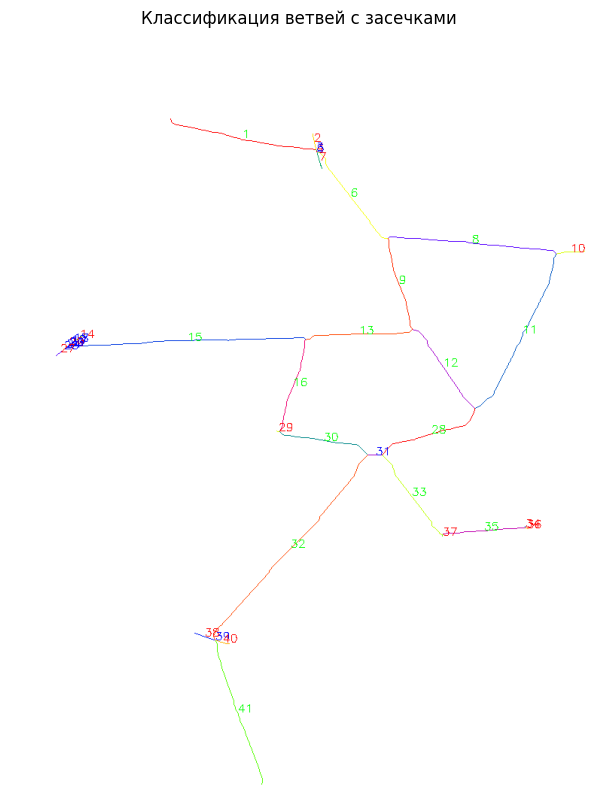

In [13]:
skeleton = Skeleton(skeletonized_with_notches[25])
plt.figure(figsize=(10,10))
plt.imshow(draw_paths(skeleton))
plt.axis('off')
plt.title('Классификация ветвей с засечками')
plt.savefig('edge_clf_notches_demo.svg', bbox_inches='tight')

## Solve

2:	[3, 4, 3, 3]	[3, 4, 3, 3]	[3, 4, 3, 3]	[3, 4, 3, 3]	[3, 4, 3, 3]
13:	[3, 4, 3, 3]	[3, 4, 3, 3]	[3, 4, 3, 3]	[3, 4, 3, 3]	[3, 4, 3, 3]
3:	[4, 5, 4, 1]	[4, 5, 4, 1]	[4, 5, 4, 1]	[4, 5, 4, 1]	[4, 5, 4, 1]
25:	[4, 5, 4, 1]	[4, 5, 4, 1]	[4, 5, 4, 1]	[4, 5, 4, 1]	[4, 5, 4, 1]
4:	[4, 3, 5, 2, 1]	[4, 3, 5, 2, 1]	[4, 3, 5, 2, 1]	[4, 3, 5, 2, 1]	[4, 3, 5, 2, 1]
19:	[3, 4, 5, 2, 1]	[4, 3, 5, 2, 1]	[4, 3, 5, 2, 1]	[4, 3, 5, 2, 1]	[4, 3, 5, 2, 1]
5:	[6, 3, 4, 2]	[6, 3, 4, 2]	[6, 3, 4, 2]	[6, 3, 4, 2]	[6, 3, 4, 2]
7:	[6, 3, 4, 2]	[6, 3, 4, 2]	[6, 3, 4, 2]	[6, 3, 4, 2]	[6, 3, 4, 2]


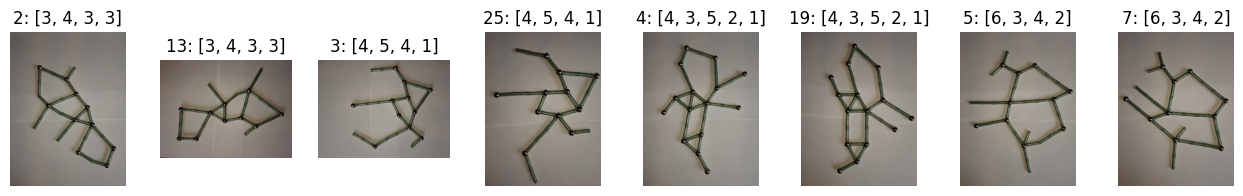

{2: [3, 4, 3, 3],
 13: [3, 4, 3, 3],
 3: [4, 5, 4, 1],
 25: [4, 5, 4, 1],
 4: [4, 3, 5, 2, 1],
 19: [4, 3, 5, 2, 1],
 5: [6, 3, 4, 2],
 7: [6, 3, 4, 2]}

In [14]:
from skeleton import pipeline


pipeline(images_w, 5, print_results=True, plot_results=True)